In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exploratory Data Analysis

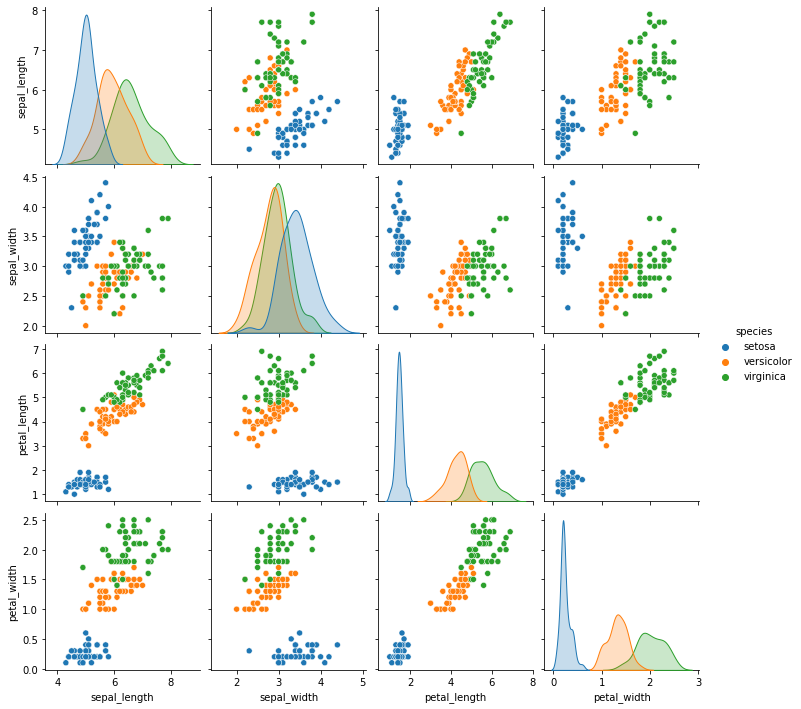

In [4]:
sns.pairplot(iris, hue='species')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

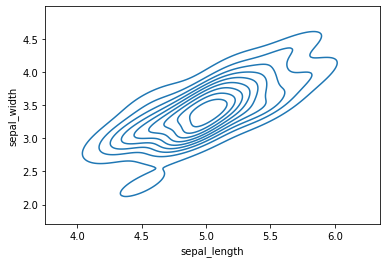

In [7]:
sns.kdeplot(data=iris[iris['species'] == 'setosa'], x='sepal_length', y='sepal_width')

# Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [15]:
y = iris['species']
X = iris.drop(columns=['species'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train Model

In [16]:
from sklearn.svm import SVC

In [17]:
model = SVC()

In [18]:
model.fit(X_train, y_train)

SVC()

# Model Evaluation

In [19]:
predictions = model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(confusion_matrix(y_test, predictions))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


In [22]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



# Gridsearch Practice

In [23]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [26]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.900, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.850, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.900, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.900, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.850, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.900, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.950, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.900, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.900, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] 

[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.900, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.950, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.900, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.900, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.3s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [27]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [28]:
grid.best_estimator_

SVC(C=100, gamma=0.01)